## Analysis of Additional Questions 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import random
import missingno as msno
from datetime import datetime

#to see plot directly  instead giving plt.show()
%matplotlib inline
%reload_ext autoreload 
%autoreload 2

In [4]:
# Creating DataFrame for Labs
df_Labs = pd.read_excel("Cardiac_Outcomes.xlsx", sheet_name = "Labs")

# Creating DataFrame for Demography
df_Demography = pd.read_excel("Cardiac_Outcomes.xlsx", sheet_name = "Demography")

# Creating Dataframe for Hospitalization_Discharge
df_HospitalDischarge = pd.read_excel("Cardiac_Outcomes.xlsx", sheet_name = "Hospitalization_Discharge")

# Creating Dataframe for CardiacComplications
df_CardiacComplication = pd.read_excel("Cardiac_Outcomes.xlsx", sheet_name = "CardiacComplications")

# Creating Dataframe for Responsivenes
df_Responsive = pd.read_excel("Cardiac_Outcomes.xlsx", sheet_name = "Responsivenes")

# Creating Dataframe for PatientHistory
df_PatientHistory = pd.read_excel("Cardiac_Outcomes.xlsx", sheet_name = "PatientHistory")

# Creating Dataframe for Patient_Precriptions
df_PatientPrecription = pd.read_excel("Cardiac_Outcomes.xlsx" ,sheet_name = "Patient_Precriptions")

#### Question 1 : What insights can be drawn from age and gender distribution across different discharge departments?

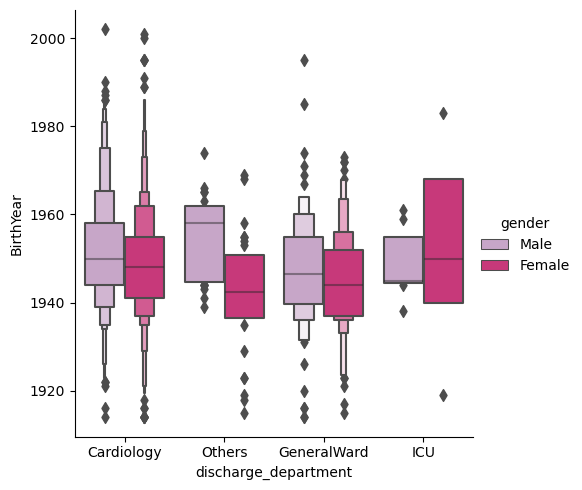

In [8]:
def random_age(age):
    numbers = age.split('-')
    return random.randint(int(numbers[0]), int(numbers[1]))

df_Demography['Age'] = df_Demography['ageCat'].apply(random_age)
import datetime
# Function to calculate the birth year based on the age
# The current year is calculated using the datetime module
# The birth year is calculated by subtracting the age from the current year
def calculate_birth_year(age):
    current_year = datetime.datetime.now().year
    birth_year = current_year - age
    return birth_year
df_Demography['BirthYear'] = df_Demography['Age'].apply(calculate_birth_year)
Boxen_df = pd.merge(df_Demography, df_HospitalDischarge, on='inpatient_number', how='left')
sns.catplot(x='discharge_department', y='BirthYear',hue='gender', data=Boxen_df, kind="boxen", palette = 'PuRd')

#### Question 2: What is the average age of patients who were readmitted within 28 days?

In [24]:
df = pd.merge(df_HospitalDischarge, df_Demography, on='inpatient_number')
df = pd.merge(df, df_PatientHistory, on='inpatient_number')


In [25]:
avg_age_readmit_28_days = df[df['re_admission_within_28_days'] == 1]['Age'].mean()
print(avg_age_readmit_28_days)

75.62857142857143


####  Question 3: How many patients required respiratory support and were readmitted within 3 months?

In [26]:
respiratory_support_readmit_3_months = df[(df['respiratory_support'] == 1) & (df['re_admission_within_3_months'] == 1)].shape[0]
print(respiratory_support_readmit_3_months)

0


####  Question 4 : What is the gender distribution of patients who died within 6 months? 

In [27]:
gender_distribution_death_6_months = df[df['death_within_6_months'] == 1]['gender'].value_counts()
print(gender_distribution_death_6_months)

Male      29
Female    28
Name: gender, dtype: int64


####  Question 5: What is the most common occupation of patients who were admitted to the hospital more than once?

In [28]:
common_occupation_multiple_admissions = df[df['visit_times'] > 1]['occupation'].mode()[0]
print(common_occupation_multiple_admissions)

UrbanResident


####  Question 6: What is the most common discharge department for patients who were readmitted within 3 months?

In [29]:
common_discharge_department_readmit_3_months = df[df['re_admission_within_3_months'] == 1]['discharge_department'].mode()[0]
print(common_discharge_department_readmit_3_months)

Cardiology


#### Question 7: Plot a histogram of the ages of all patients. What is the most common age group among the patients?

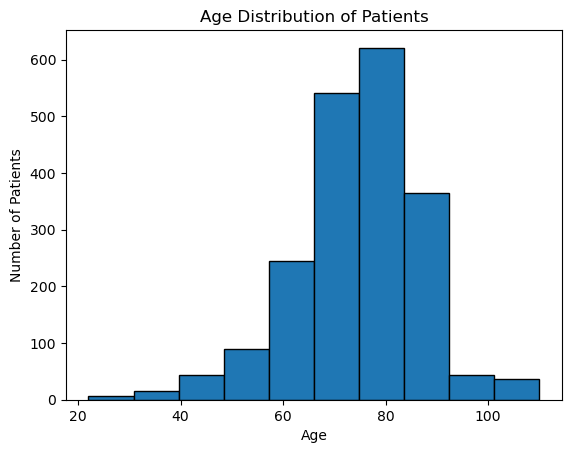

In [30]:
plt.hist(df['Age'], bins=10, edgecolor='black')
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.show()

#### Question 8 : Plot a bar chart showing the number of male and female patients. Which gender is more common among the patients?

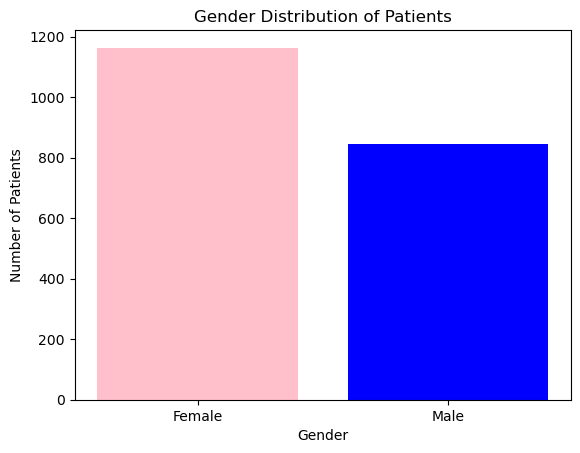

In [38]:
gender_counts = df['gender'].value_counts()

plt.bar(gender_counts.index, gender_counts.values, color=['pink', 'blue'])
plt.title('Gender Distribution of Patients')
plt.xlabel('Gender')
plt.ylabel('Number of Patients')
plt.show()

####  Question 9: What is the average BMI of patients with Chronic obstructive pulmonary disease who returned to the emergency department within 6 months? 

In [34]:
avg_bmi_COPD_return_6_months = df[(df['Chronic_obstructive_pulmonary_disease'] == 1) & (df['return_to_emergency_department_within_6_months'] == 1)]['BMI'].mean
print(avg_bmi_COPD_return_6_months)

<bound method NDFrame._add_numeric_operations.<locals>.mean of 3       22.491349
38      17.578125
40      19.631118
42      30.468750
62      19.031142
          ...    
1908    20.028673
1943    13.333333
1976    19.531250
1977    19.531250
1993    15.235261
Name: BMI, Length: 87, dtype: float64>


####  Question 10: calculates the percentage of patients with each disease who were readmitted within 28 days.

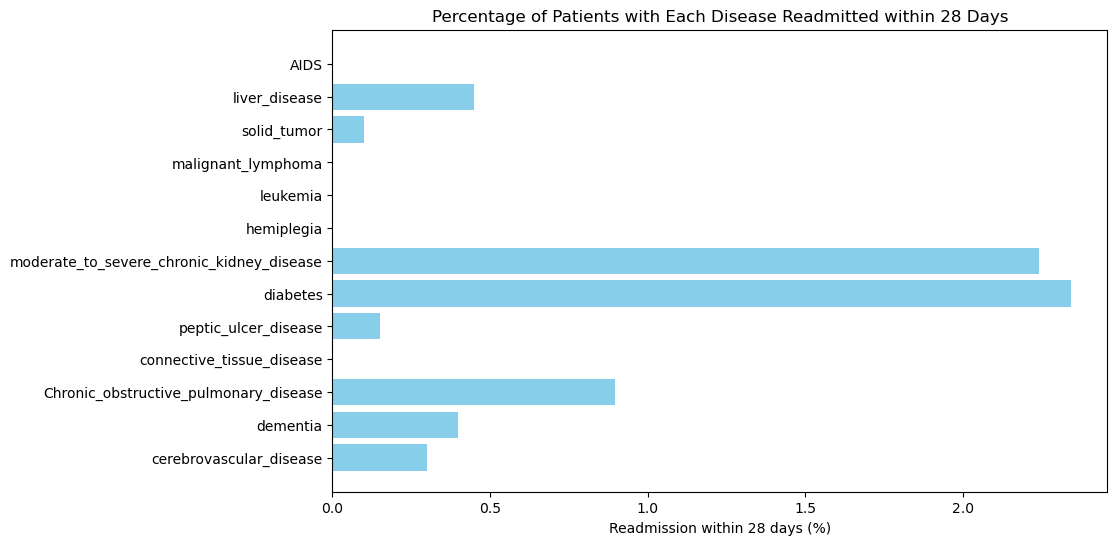

In [36]:
def calculate_readmission_percentages(df):
    disease_columns = ['cerebrovascular_disease', 'dementia', 'Chronic_obstructive_pulmonary_disease', 
                       'connective_tissue_disease', 'peptic_ulcer_disease', 'diabetes', 
                       'moderate_to_severe_chronic_kidney_disease', 'hemiplegia', 'leukemia', 
                       'malignant_lymphoma', 'solid_tumor', 'liver_disease', 'AIDS']
    
    readmission_percentages = []
    for disease in disease_columns:
        total_patients = df[df[disease] == 1].shape[0]
        readmitted_patients = df[(df[disease] == 1) & (df['re_admission_within_28_days'] == 1)].shape[0]
        readmission_percentage = (readmitted_patients / 2008) * 100
        readmission_percentages.append(readmission_percentage)
    
    return disease_columns, readmission_percentages

diseases, readmission_percentages = calculate_readmission_percentages(df)

plt.figure(figsize=(10, 6))
plt.barh(diseases, readmission_percentages, color='skyblue')
plt.xlabel('Readmission within 28 days (%)')
plt.title('Percentage of Patients with Each Disease Readmitted within 28 Days')
plt.show()

#### Question 11: What is patient weight based on patient id weight and height?

In [41]:
Patient_id = input("Enter your inpatient_number	 :  ")
weight = float(input("Enter your weight in Kg:  "))
Height =float(input("Enter your height in meters:  "))
BMI = weight  / (Height * Height)
print(BMI)
if BMI > 0:
    if BMI <18.5:
        print(Patient_id + ',is underweight')
    elif BMI <= 24.9:
        print(Patient_id + ',is Normal weight')
    elif BMI <= 39.9:
         print(Patient_id + ',is Over weight')
    else: print(Patient_id + ',is Obese')

Enter your inpatient_number	 :  722128
Enter your weight in Kg:  34
Enter your height in meters:  12
0.2361111111111111
722128,is underweight
